# Problem Set 1: Analysis of racial disparities in felony sentencing

# 0. Load packages and imports

In [2]:
## basic functionality
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle


## can add others if you need them

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [4]:
df = pd.read_csv('/Users/andreagao/Downloads/pset1_inputdata/sentencing_asof0405.csv')

/var/folders/lq/nvsx7rwj0nz3xmwslrrk6j800000gn/T/ipykernel_1976/2554269315.py:1: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/andreagao/Downloads/pset1_inputdata/sentencing_asof0405.csv')


## 0.2: Print head, dimensions, info (0 points)

In [6]:
df.head()
df.shape
df.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


(248146, 41)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248146 entries, 0 to 248145
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            248146 non-null  int64  
 1   CASE_PARTICIPANT_ID                248146 non-null  int64  
 2   RECEIVED_DATE                      248146 non-null  object 
 3   OFFENSE_CATEGORY                   248146 non-null  object 
 4   PRIMARY_CHARGE_FLAG                248146 non-null  bool   
 5   CHARGE_ID                          248146 non-null  int64  
 6   CHARGE_VERSION_ID                  248146 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  248146 non-null  object 
 8   CHARGE_COUNT                       248146 non-null  int64  
 9   DISPOSITION_DATE                   248146 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        248146 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2427

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [8]:
df[['CASE_ID','CASE_PARTICIPANT_ID','CHARGE_ID']].nunique()

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

1. Why there are more unique people than unique cases?
One case can involve more than one person. For example, there can be a case of robbery where multiple people are robbing one person. This would be recorded as the same case but recorded multiple times becuase it involves multiple individuals.
2. Why there are more unique charges than unique people?
One person can have more than one charge in one case - for exmaple, if they committed both robbery and murder in one case.

In [10]:
df.groupby(['CASE_ID', 'CASE_PARTICIPANT_ID'])['CHARGE_ID'].nunique().mean()
df.groupby(['CASE_ID', 'CASE_PARTICIPANT_ID'])['CHARGE_ID'].nunique().median()

1.1261457610967227

1.0

In [12]:
df.groupby(['CASE_ID'])['CASE_PARTICIPANT_ID'].nunique().mean()
df.groupby(['CASE_ID'])['CASE_PARTICIPANT_ID'].nunique().median()

1.0731980214561636

1.0

In [14]:
df.groupby(['CASE_PARTICIPANT_ID'])['CASE_ID'].nunique()

CASE_PARTICIPANT_ID
96757475659     1
97064562856     1
97249060542     1
97581722610     1
97603050731     1
               ..
905289187184    1
905322500577    1
905518794790    1
905533705601    1
905535215556    1
Name: CASE_ID, Length: 211977, dtype: int64

No, because the same person does not have the same participant ID across all data - from above, we can see that there is only one case per participant ID, which means either every person only committed one crime, or the ID is only case-dependant not person-dependant. 

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


OFFENSE_CATEGORY is the original broad offense category; after primary charge is known, the case evolved, and the final offense category is recorded as UPDATED_OFFENSE_CATEGORY.

In [16]:
df['is_changed_offense'] = (df['OFFENSE_CATEGORY'] != df['UPDATED_OFFENSE_CATEGORY'])
print(df[df["is_changed_offense"]]["OFFENSE_CATEGORY"].value_counts().sort_values(ascending = False))

OFFENSE_CATEGORY
PROMIS Conversion               6394
DUI                             3896
UUW - Unlawful Use of Weapon    2155
Other Offense                   2125
Aggravated Battery              1927
                                ... 
Perjury                            4
Prostitution                       3
Compelling Gang Membership         2
Benefit Recipient Fraud            2
Violate Bail Bond                  2
Name: count, Length: 88, dtype: int64


In [18]:
print(df[df['is_changed_offense']][['OFFENSE_CATEGORY','UPDATED_OFFENSE_CATEGORY']].tail())

                                 OFFENSE_CATEGORY  \
248125               UUW - Unlawful Use of Weapon   
248126                              Other Offense   
248139  Driving With Suspended Or Revoked License   
248140  Driving With Suspended Or Revoked License   
248141                              Home Invasion   

            UPDATED_OFFENSE_CATEGORY  
248125                     Narcotics  
248126                 Fraudulent ID  
248139                     Narcotics  
248140                     Narcotics  
248141  UUW - Unlawful Use of Weapon  


We can see a few cases where "UUW - Unlawful Use of Weapon" and "Driving With Suspended Or Revoked License" as original offense category were updated as "Narcotics". The reason might be that inappropriate drug usage is the root cause of the use of weapon or illegal driving. Only after a thorough drug test is when people found out the root cause. 

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [34]:
conditions = [df['UPDATED_OFFENSE_CATEGORY'].str.startswith("Aggravated"),
             df['UPDATED_OFFENSE_CATEGORY'].str.contains("Arson"),
             df['UPDATED_OFFENSE_CATEGORY'].str.contains("Homicide"),
             df['UPDATED_OFFENSE_CATEGORY'].str.contains("Vehicle|Vehicular"),
             df['UPDATED_OFFENSE_CATEGORY'].str.contains("Battery")]

cats = [df['UPDATED_OFFENSE_CATEGORY'].str.replace("Aggravated ", ""), "Arson", "Homicide", "Vehicle-related", "Battery"]

df['simplified_offense_derived'] = np.select(conditions, cats, df['UPDATED_OFFENSE_CATEGORY'])
print(df.UPDATED_OFFENSE_CATEGORY.nunique(), df.simplified_offense_derived.nunique())

79 67


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [36]:
df.RACE.unique()

array(['Black', 'White [Hispanic or Latino]', 'White', 'HISPANIC', nan,
       'ASIAN', 'White/Black [Hispanic or Latino]', 'Asian',
       'American Indian', 'Unknown', 'Biracial'], dtype=object)

In [38]:
df['is_black_derived'] = df.RACE.str.contains("Black")

In [40]:
df['is_black_derived'] = df.RACE.str.contains("Black", case = False)
df['is_hisp_derived'] = (~df.RACE.str.contains('Black', na = False)) & df.RACE.str.contains('hispanic', case = False)
df['is_white_derived'] = (df.RACE == "White")

df['is_othereth_derived'] = ~(df['is_black_derived'] | df['is_hisp_derived'] | df['is_white_derived'])
df[['RACE','is_black_derived','is_hisp_derived','is_white_derived','is_othereth_derived']]

,RACE,is_black_derived,is_hisp_derived,is_white_derived,is_othereth_derived
0,Black,True,False,False,False
1,Black,True,False,False,False
2,Black,True,False,False,False
3,Black,True,False,False,False
4,Black,True,False,False,False
...,...,...,...,...,...
248141,NaN,NaN,False,False,True
248142,Black,True,False,False,False
248143,White,False,False,True,False
248144,White,False,False,True,False


In [42]:
df['is_male_derived'] = df.GENDER.str.contains("male", case = False)

In [50]:
df.AGE_AT_INCIDENT.quantile(0.9999) # Checking 99.99th percentile value

81.0

In [46]:
df['age_derived'] = np.where(
    df.AGE_AT_INCIDENT > df.AGE_AT_INCIDENT.quantile(0.9999), 
    df.AGE_AT_INCIDENT.quantile(0.9999), 
    df.AGE_AT_INCIDENT)

In [523]:
df.SENTENCE_DATE.str.replace(r"291[4-7]", lambda x: "20"+x.group(0)[2:], regex=True)

0           6/2/1986 12:00:00 AM
1           6/2/1986 12:00:00 AM
2           6/2/1986 12:00:00 AM
3           6/2/1986 12:00:00 AM
4         10/16/2014 12:00:00 AM
                   ...          
248141     3/19/2021 12:00:00 AM
248142     3/23/2021 12:00:00 AM
248143     3/11/2021 12:00:00 AM
248144     3/11/2021 12:00:00 AM
248145     3/11/2021 12:00:00 AM
Name: SENTENCE_DATE, Length: 248146, dtype: object

In [52]:
df['clean_dates'] = df.SENTENCE_DATE.str.replace(r"2[1-9][0-9][0-9]", lambda x: "20"+x.group(0)[2:], regex=True)
df['clean_dates'] = df.clean_dates.str.replace(r"20[3-9][0-9]", lambda x: "201"+x.group(0)[3:], regex=True)
df['clean_dates'] = df.clean_dates.str.replace(r"202[2-9]", lambda x: "2021", regex=True)

In [54]:
df['sentenceymd_derived'] = pd.to_datetime(
    df.clean_dates, 
    format='mixed')
df['sentenceymd_derived'] = df['sentenceymd_derived'].dt.date
df['sentenceymd_derived']
type(df['sentenceymd_derived'][0])

0         1986-06-02
1         1986-06-02
2         1986-06-02
3         1986-06-02
4         2014-10-16
             ...    
248141    2021-03-19
248142    2021-03-23
248143    2021-03-11
248144    2021-03-11
248145    2021-03-11
Name: sentenceymd_derived, Length: 248146, dtype: object

datetime.date

In [56]:
df['sentenceym_derived'] = pd.to_datetime(df['sentenceymd_derived']).dt.to_period('M').dt.to_timestamp()
df['sentenceym_derived']

0        1986-06-01
1        1986-06-01
2        1986-06-01
3        1986-06-01
4        2014-10-01
            ...    
248141   2021-03-01
248142   2021-03-01
248143   2021-03-01
248144   2021-03-01
248145   2021-03-01
Name: sentenceym_derived, Length: 248146, dtype: datetime64[ns]

In [60]:
# Judge:
df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].astype(str)

df['SENTENCE_JUDGE'] = df['SENTENCE_JUDGE'].replace({
    'Doug Simpson': 'Douglas Simpson',
    'Shelley Sutker': 'Shelley Sutker-Smith' 
})

unique_judges = pd.Series(df['SENTENCE_JUDGE'].unique())
judge_dict = {judge: 'judge_' + str(i + 1) for i, judge in enumerate(sorted(unique_judges))}
df['judgeid_derived'] = df['SENTENCE_JUDGE'].map(judge_dict)

## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [62]:
participant_count = df.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].count()
single_participant_cases = participant_count[participant_count == 1].index

# Subset df to only those cases
subset_df = df[df['CASE_ID'].isin(single_participant_cases)]
df.shape, subset_df.shape

((248146, 53), (165745, 53))

In [64]:
subset_df_1 = subset_df[subset_df.PRIMARY_CHARGE_FLAG & subset_df.CURRENT_SENTENCE_FLAG].copy()
subset_df_1.shape
subset_df_1.groupby(['CASE_ID', 'CASE_PARTICIPANT_ID'])['CHARGE_ID'].count().sort_values(ascending = True) # only contains 1s

(137507, 53)

CASE_ID       CASE_PARTICIPANT_ID
154954734978  225758446387           1
416654165844  812728160936           1
416653872134  812727028469           1
416653431570  812723725442           1
416653284716  812723159209           1
                                    ..
397526344836  753234782335           1
397525904272  753234027357           1
397525757417  753233744240           1
397529722494  753243370207           1
445593200623  905535215556           1
Name: CHARGE_ID, Length: 137507, dtype: int64

In [104]:
subset_df_2 = subset_df_1[~subset_df_1.SENTENCE_JUDGE.isin(['FLOOD','nan'])].copy()

In [106]:
subset_df_2.SENTENCE_DATE_CLEAN = pd.to_datetime(subset_df_2.SENTENCE_DATE, errors = 'coerce' )

subset_df_3 = subset_df_2[(subset_df_2.SENTENCE_DATE_CLEAN <= '2021-04-05') & (subset_df_2.SENTENCE_DATE_CLEAN >= '2012-01-01')].copy()
subset_df_3.shape[0]

/var/folders/lq/nvsx7rwj0nz3xmwslrrk6j800000gn/T/ipykernel_1976/1231869991.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  subset_df_2.SENTENCE_DATE_CLEAN = pd.to_datetime(subset_df_2.SENTENCE_DATE, errors = 'coerce' )
/var/folders/lq/nvsx7rwj0nz3xmwslrrk6j800000gn/T/ipykernel_1976/1231869991.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  subset_df_2.SENTENCE_DATE_CLEAN = pd.to_datetime(subset_df_2.SENTENCE_DATE, errors = 'coerce' )


121342

# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [108]:
ds = pd.read_pickle('/Users/andreagao/Downloads/pset1_inputdata/sentencing_cleaned.pkl')
ds.head()
ds.info()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


<class 'pandas.core.frame.DataFrame'>
Index: 135165 entries, 9 to 248145
Data columns (total 52 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   CASE_ID                            135165 non-null  int64         
 1   CASE_PARTICIPANT_ID                135165 non-null  int64         
 2   RECEIVED_DATE                      135165 non-null  object        
 3   OFFENSE_CATEGORY                   135165 non-null  object        
 4   PRIMARY_CHARGE_FLAG                135165 non-null  bool          
 5   CHARGE_ID                          135165 non-null  int64         
 6   CHARGE_VERSION_ID                  135165 non-null  int64         
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  135165 non-null  object        
 8   CHARGE_COUNT                       135165 non-null  int64         
 9   DISPOSITION_DATE                   135165 non-null  object        
 10  DISPOSITION_CHARGED_CHAPT

## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

    YearMonth  total_cases  black_defendants  white_defendants  prop_black  \
0     2012-01         1674              1134               242    0.677419   
1     2012-02         1450               941               233    0.648966   
2     2012-03         1612              1030               255    0.638958   
3     2012-04         1436              1000               211    0.696379   
4     2012-05         1545              1074               223    0.695146   
..        ...          ...               ...               ...         ...   
106   2020-11          491               298                76    0.606925   
107   2020-12          537               347                85    0.646182   
108   2021-01          447               278                50    0.621924   
109   2021-02          491               320                66    0.651731   
110   2021-03          532               362                79    0.680451   

     prop_white  
0      0.144564  
1      0.160690  
2      0.

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Defendants by Race Over Time')

Text(0.5, 0, 'Month-Year')

Text(0, 0.5, 'Proportion of Total Defendants')

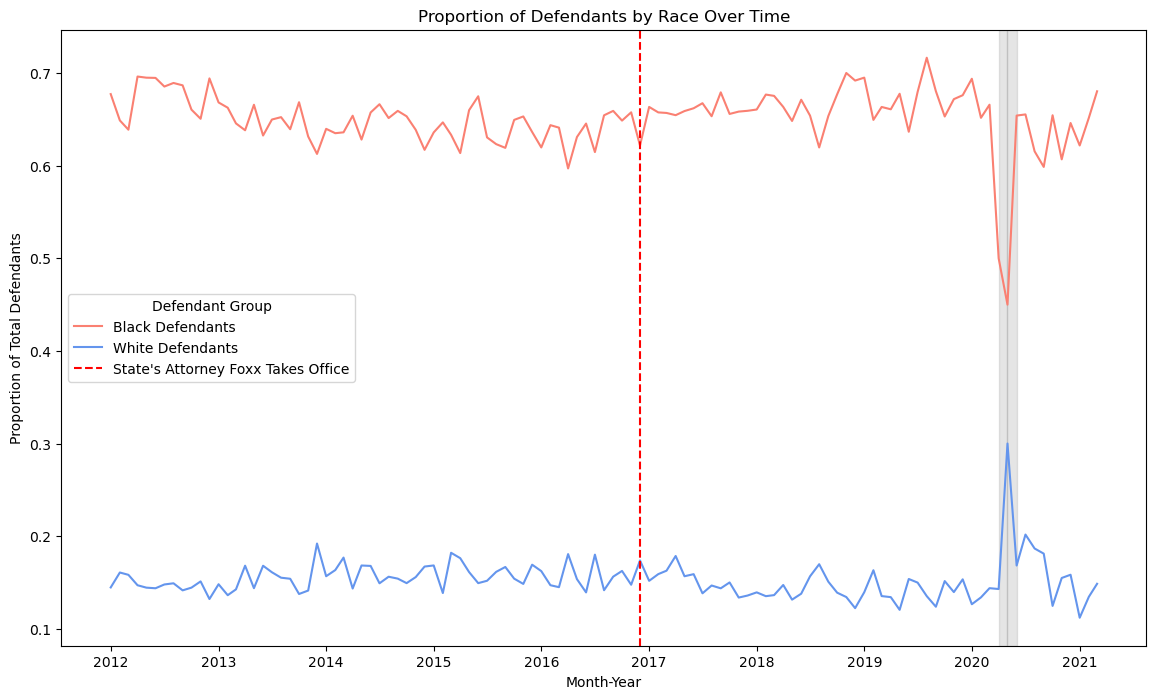

In [116]:
ds['YearMonth'] = pd.to_datetime(ds['sentenceymd_derived']).dt.to_period('M')

summary = ds.groupby('YearMonth').agg(
    total_cases=('CASE_ID', 'nunique'),
    black_defendants=('is_black_derived', 'sum'),
    white_defendants=('is_white_derived', 'sum')
).reset_index()

summary['prop_black'] = summary['black_defendants'] / summary['total_cases']
summary['prop_white'] = summary['white_defendants'] / summary['total_cases']
print(summary)

plt.figure(figsize=(14, 8))
plt.plot(summary['YearMonth'].dt.to_timestamp(), summary['prop_black'], label='Black Defendants', color='salmon')
plt.plot(summary['YearMonth'].dt.to_timestamp(), summary['prop_white'], label='White Defendants', color='cornflowerblue')

# Optional
for index, row in summary.iterrows():
    if row['total_cases'] < 100:
        plt.axvspan(row['YearMonth'].start_time, row['YearMonth'].end_time, color='grey', alpha=0.2)

# Adding a vertical line for 12-01-2016
plt.axvline(pd.to_datetime("2016-12-01"), color='red', linestyle='--', label="State's Attorney Foxx Takes Office")

plt.title('Proportion of Defendants by Race Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Proportion of Total Defendants')
plt.legend(title='Defendant Group')
plt.show()

\(N\) = Total number of unique cases for a given month

### Proportion of Black Defendants

$$
P_B = \frac{B}{N} = \frac{\sum_{i=1}^{N} \text{is\_black\_derived}_i}{N}
$$

### Proportion of White Defendants
$$
P_W = \frac{W}{N} = \frac{\sum_{i=1}^{N} \text{is\_white\_derived}_i}{N}
$$

Observations: In April and May 2020, there is a notable increase in the proportion of Black defendants among sentenced individuals. This may be resulted from an increased societal awareness during this time due to the Murder of George Floyd.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

<Figure size 1400x800 with 0 Axes>

Text(0.5, 1.0, 'Difference in Incarceration Proportions between Black and White Defendants Over Time')

Text(0.5, 0, 'Month-Year')

Text(0, 0.5, 'Difference in Proportions (Black - White)')

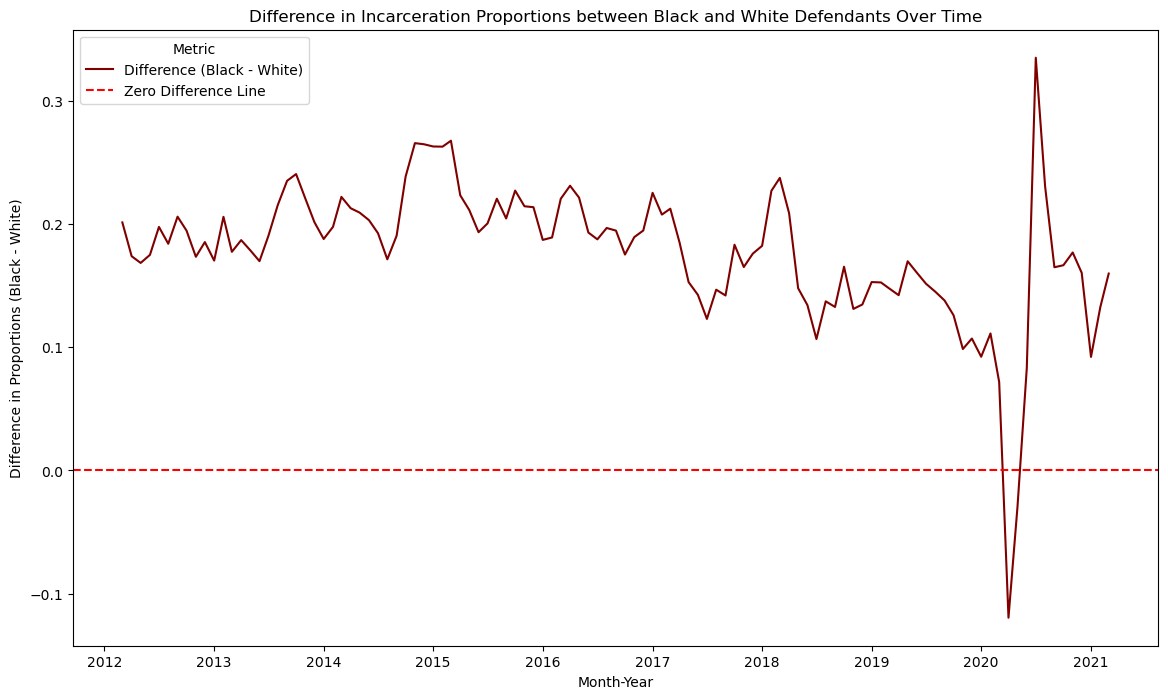

In [133]:
ds['incarcerated'] = ds['COMMITMENT_TYPE'] == "Illinois Department of Corrections"

summary_incarceration = ds.groupby('YearMonth').agg(
    total_black=('is_black_derived', 'sum'),
    incarcerated_black=('incarcerated', lambda x: x[ds['is_black_derived'] == 1].sum()), 
    total_white=('is_white_derived', 'sum'),
    incarcerated_white=('incarcerated', lambda x: x[ds['is_white_derived'] == 1].sum()) 
).reset_index()

summary_incarceration['prop_black_incarcerated'] = summary_incarceration['incarcerated_black'] / summary_incarceration['total_black']
summary_incarceration['prop_white_incarcerated'] = summary_incarceration['incarcerated_white'] / summary_incarceration['total_white']
summary_incarceration['difference'] = summary_incarceration['prop_black_incarcerated'] - summary_incarceration['prop_white_incarcerated']

# Smoothed line
summary_incarceration['smoothed_difference'] = summary_incarceration['difference'].rolling(window=3).mean()

plt.figure(figsize=(14, 8))
plt.plot(summary_incarceration['YearMonth'].dt.to_timestamp(), summary_incarceration['smoothed_difference'], 
         color='maroon', label='Difference (Black - White)')
plt.axhline(0, color='red', linestyle='--', label='Zero Difference Line')

plt.title('Difference in Incarceration Proportions between Black and White Defendants Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Difference in Proportions (Black - White)')
plt.legend(title='Metric')
plt.show()

The plot indicates a the difference in incarceration rates between Black and White defendants over time. The data shows that the difference is slightly decreasing from 2015 to 2020 right before the big movements. The gap between the two decreased drastically during the months around George Floyd incident in April and May 2020, but it increased to a relative high right after. One potential factor of this change could be the outburst of the COVID-19 pandemic.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [137]:
black_defendants = ds[ds['is_black_derived'] == 1]
white_defendants = ds[ds['is_white_derived'] == 1]

# Count offenses for Black defendants
black_offense_counts = black_defendants['simplified_offense_derived'].value_counts().head(10)

# Count offenses for White defendants
white_offense_counts = white_defendants['simplified_offense_derived'].value_counts().head(10)

top_black_offenses = set(black_offense_counts.index)
top_white_offenses = set(white_offense_counts.index)

frequent_offenses = top_black_offenses.union(top_white_offenses)
print("Frequent Offenses:")
print(frequent_offenses)

Frequent Offenses:
{'Vehicle-related', 'Retail Theft', 'Residential Burglary', 'Battery', 'Other Offense', 'Driving With Suspended Or Revoked License', 'UUW - Unlawful Use of Weapon', 'Narcotics', 'Theft', 'Burglary', 'DUI', 'Robbery'}


### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [141]:
def calculate_incarceration_rates(offense):
    offense_df = ds[ds['simplified_offense_derived'] == offense]
    
    # Calculate total counts
    total_black = offense_df[offense_df['is_black_derived'] == 1].shape[0]
    incarcerated_black = offense_df[(offense_df['is_black_derived'] == 1) & 
                                    (offense_df['COMMITMENT_TYPE'] == "Illinois Department of Corrections")].shape[0]
    
    total_white = offense_df[offense_df['is_white_derived'] == 1].shape[0]
    incarcerated_white = offense_df[(offense_df['is_white_derived'] == 1) & 
                                    (offense_df['COMMITMENT_TYPE'] == "Illinois Department of Corrections")].shape[0]
    
    black_rate = incarcerated_black / total_black if total_black > 0 else 0
    white_rate = incarcerated_white / total_white if total_white > 0 else 0
    
    return black_rate, white_rate

offense_rates = []

for offense in frequent_offenses:
    black_rate, white_rate = calculate_incarceration_rates(offense)
    offense_rates.append({'Offense': offense, 
                          'Black_Incarceration_Rate': black_rate, 
                          'White_Incarceration_Rate': white_rate})

rates_df = pd.DataFrame(offense_rates)
print(rates_df)

                                      Offense  Black_Incarceration_Rate  \
0                             Vehicle-related                  0.553750   
1                                Retail Theft                  0.595713   
2                        Residential Burglary                  0.717791   
3                                     Battery                  0.509032   
4                               Other Offense                  0.340580   
5   Driving With Suspended Or Revoked License                  0.582193   
6                UUW - Unlawful Use of Weapon                  0.696191   
7                                   Narcotics                  0.537876   
8                                       Theft                  0.386961   
9                                    Burglary                  0.661927   
10                                        DUI                  0.404997   
11                                    Robbery                  0.650341   

    White_Incarceration_

In [143]:
rates_df['disparity'] = rates_df['Black_Incarceration_Rate'] - rates_df['White_Incarceration_Rate']

disparities = rates_df[['Offense', 'disparity']].sort_values(by='disparity', ascending=False)
print("Disparities in Incarceration Rates:",disparities)

Disparities in Incarceration Rates:                                       Offense  disparity
7                                   Narcotics   0.295341
3                                     Battery   0.233480
6                UUW - Unlawful Use of Weapon   0.214217
1                                Retail Theft   0.146132
9                                    Burglary   0.126164
4                               Other Offense   0.110351
5   Driving With Suspended Or Revoked License   0.085642
8                                       Theft   0.068240
2                        Residential Burglary   0.063677
10                                        DUI   0.063143
11                                    Robbery   0.061055
0                             Vehicle-related  -0.031885


Narcotics, Battery, and UUW are the three largest categories where judges are more likely to incarcerate Black defendants than White defendants.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [149]:
ds[ds['simplified_offense_derived'] == "Retail Theft"] # Making sure the capitalization is correct

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived,YearMonth,incarcerated
39,157284878056,228346415717,8/29/2001 12:00:00 AM,PROMIS Conversion,True,55612048051,194069358273,RET THEFT/DISPLAY MERCH/>$150,1,11/12/2013 12:00:00 AM,...,True,False,False,True,31.0,2013-11-08,2013-11-01,judge_296,2013-11,True
50,158663109151,248439204620,3/10/2001 12:00:00 AM,PROMIS Conversion,True,58023676525,747592835613,RET THEFT/DISP MERCH/<$150/1ST,1,3/22/2016 12:00:00 AM,...,False,False,False,False,30.0,2016-03-22,2016-03-01,judge_35,2016-03,False
66,162816159271,113789301676,4/21/2002 12:00:00 AM,PROMIS Conversion,True,59368151356,678989817777,RET THEFT/DISP MERCH/<$150/1ST,1,11/28/2012 12:00:00 AM,...,False,False,False,False,49.0,2012-11-28,2012-11-01,judge_35,2012-11,False
171,175427744780,172920102217,11/16/2003 12:00:00 AM,PROMIS Conversion,True,74224341826,697336028489,RET THEFT/DISP MERCH/<$150/1ST,1,3/15/2013 12:00:00 AM,...,False,False,False,True,NaN,2013-03-15,2013-03-01,judge_90,2013-03,False
176,175522025479,173310236965,6/8/2003 12:00:00 AM,PROMIS Conversion,True,211098284702,387852662777,RETAIL THEFT,1,6/26/2012 12:00:00 AM,...,False,False,False,False,28.0,2012-06-26,2012-06-01,judge_236,2012-06,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248017,444113052385,900635410005,10/14/2020 12:00:00 AM,Retail Theft,True,445188738052,835052047022,RETAIL THEFT/DISP MERCH/<$300,1,12/23/2020 12:00:00 AM,...,False,False,False,True,59.0,2020-12-23,2020-12-01,judge_224,2020-12,False
248040,444208361067,900956181174,10/21/2020 12:00:00 AM,Retail Theft,True,445354698392,836787520848,THEFT,1,2/17/2021 12:00:00 AM,...,False,True,False,True,48.0,2021-02-17,2021-02-01,judge_288,2021-02,False
248063,444415426154,901666992719,11/5/2020 12:00:00 AM,Retail Theft,True,445752027858,832355649270,RETAIL THEFT,1,1/14/2021 12:00:00 AM,...,False,False,False,True,47.0,2021-01-14,2021-01-01,judge_62,2021-01,False
248066,444439804030,901753720787,11/7/2020 12:00:00 AM,Retail Theft,True,445790388276,838252448720,RETAIL THEFT/DISP MERCH/<$300,1,3/23/2021 12:00:00 AM,...,False,False,False,True,NaN,2021-03-23,2021-03-01,judge_99,2021-03,False


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Bandwidth (Months)')

Text(0, 0.5, 'Black - White Disparity in Incarceration Proportion')

Text(0.5, 1.0, 'Disparity in Incarceration: Before and After Policy Change')

([<matplotlib.axis.XTick at 0x15688a5a0>,
 [Text(0.175, 0, '2 Months'),
  Text(1.175, 0, '4 Months'),
  Text(2.175, 0, '8 Months'),
  Text(3.175, 0, '12 Months')])

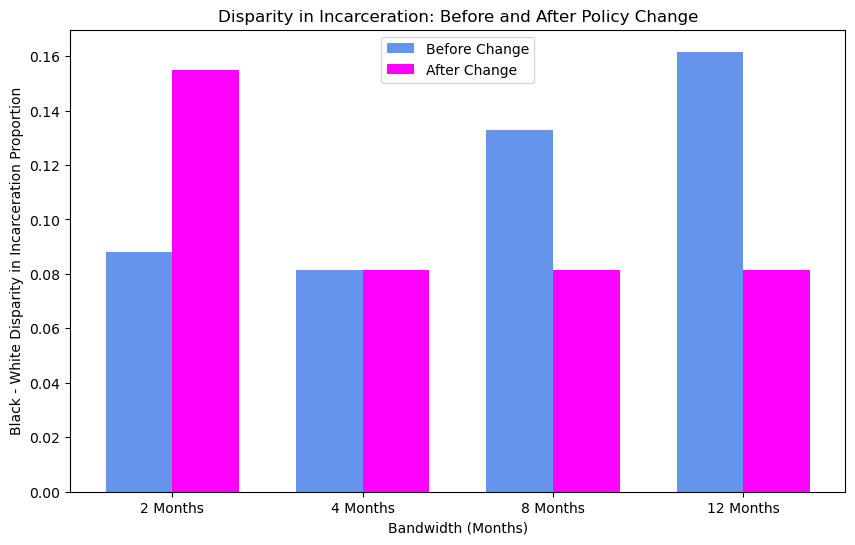

In [159]:
retail_theft_df = ds[ds['simplified_offense_derived'] == "Retail Theft"]

def calculate_disparities(start_date, end_date):
    time_window_df = retail_theft_df[(retail_theft_df['sentenceym_derived'] >= start_date) &
                                      (retail_theft_df['sentenceym_derived'] <= end_date)]
    
    total_black = time_window_df[time_window_df['is_black_derived'] == 1].shape[0]
    incarcerated_black = time_window_df[(time_window_df['is_black_derived'] == 1) & 
                                        (time_window_df['COMMITMENT_TYPE'] == "Illinois Department of Corrections")].shape[0]

    total_white = time_window_df[time_window_df['is_white_derived'] == 1].shape[0]
    incarcerated_white = time_window_df[(time_window_df['is_white_derived'] == 1) & 
                                        (time_window_df['COMMITMENT_TYPE'] == "Illinois Department of Corrections")].shape[0]

    prop_black = incarcerated_black / total_black if total_black > 0 else 0
    prop_white = incarcerated_white / total_white if total_white > 0 else 0

    disparity = prop_black - prop_white
    return prop_black, prop_white, disparity, total_black, total_white


bandwidths = {
    '2 Months': ('2016-10', '2016-11', '2017-01', '2017-02'),
    '4 Months': ('2016-08', '2016-11', '2017-01', '2017-04'),
    '8 Months': ('2016-04', '2016-11', '2017-01', '2017-04'),
    '12 Months': ('2015-12', '2016-11', '2017-01', '2017-04')
}

results = []

for label, (start_prev, end_prev, start_post, end_post) in bandwidths.items():
    prop_black_prev, prop_white_prev, disparity_prev, n_black_prev, n_white_prev = calculate_disparities(start_prev, end_prev)
    prop_black_post, prop_white_post, disparity_post, n_black_post, n_white_post = calculate_disparities(start_post, end_post)
    
    results.append({
        'Bandwidth': label,
        'Pre_Disparity': disparity_prev,
        'Post_Disparity': disparity_post,
        'N_Black_Pre': n_black_prev,
        'N_White_Pre': n_white_prev,
        'N_Black_Post': n_black_post,
        'N_White_Post': n_white_post,
    })

results_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
positions = range(len(results_df))

plt.bar(positions, results_df['Pre_Disparity'], bar_width, label='Before Change', color='cornflowerblue')
plt.bar([p + bar_width for p in positions], results_df['Post_Disparity'], bar_width, label='After Change', color='fuchsia')

plt.xlabel('Bandwidth (Number of Months)')
plt.ylabel('Black - White Disparity in Incarceration Proportion')
plt.title('Disparity in Incarceration: Before and After Policy Change')
plt.xticks([p + bar_width / 2 for p in positions], results_df['Bandwidth'])
plt.legend()
plt.show()

### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

Supporters of the argument that the policy change would reduce disparities could point to a reduction in the disparity in incarceration rates post-policy change, particularly in longer bandwidths, while those concerned that it might widen disparities could highlight the significant increase in disparity in the 2 month bandwidth. Although it seems that the disparities have increased post-policy after 2 months, it seems that there is long-term sustained decrease in disparities, as evident in the decrease in after change disparity.